In [1]:
# Import necessary libraries
import pandas as pd          # For data manipulation and analysis
import numpy as np           # For numerical operations
from matplotlib import pyplot as plt   # For creating plots
import seaborn as sns         # For statistical data visualization
import datetime              # For working with dates
from sklearn.model_selection import train_test_split   # For splitting data into training and testing sets

# Display plots inline within the Jupyter Notebook
%matplotlib inline

In [2]:

# Read the Uber data from the CSV file into a Pandas DataFrame
data = pd.read_csv(r'uber data.csv')

# Read test data from the CSV file into a Pandas DataFrame
testdata = pd.read_csv(r'test.csv')

In [3]:

# Display the first few rows of the 'data' DataFrame to inspect the data structure
data.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


In [4]:

# Display concise information about the 'data' DataFrame, including data types and non-null counts
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   key                200000 non-null  object 
 1   fare_amount        200000 non-null  float64
 2   pickup_datetime    200000 non-null  object 
 3   pickup_longitude   200000 non-null  float64
 4   pickup_latitude    200000 non-null  float64
 5   dropoff_longitude  199999 non-null  float64
 6   dropoff_latitude   199999 non-null  float64
 7   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 12.2+ MB


In [5]:
# Generate descriptive statistics of the 'data' DataFrame, including measures of central tendency, dispersion, and shape of the distribution
data.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,200000.000000,200000.000000,200000.000000,199999.000000,199999.000000,200000.000000
mean,11.342877,-72.506121,39.922326,-72.518673,39.925579,1.682445
std,9.837855,11.608097,10.048947,10.724226,6.751120,1.306730
min,-44.900000,-736.550000,-3116.285383,-1251.195890,-1189.615440,0.000000
25%,6.000000,-73.992050,40.735007,-73.991295,40.734092,1.000000
50%,8.500000,-73.981743,40.752761,-73.980072,40.753225,1.000000
75%,12.500000,-73.967068,40.767127,-73.963508,40.768070,2.000000
max,500.000000,2140.601160,1703.092772,40.851027,404.616667,6.000000


In [6]:

# Convert the 'pickup_datetime' column to datetime format using Pandas
data['pickup_datetime'] = pd.to_datetime(data['pickup_datetime'])

In [7]:
# Import the 'calendar' module to work with day names
import calendar

# Extract and create new columns for day, hour, weekday, month, and year from the 'pickup_datetime' column
data['day'] = data['pickup_datetime'].apply(lambda x: x.day)
data['hour'] = data['pickup_datetime'].apply(lambda x: x.hour)
data['weekday'] = data['pickup_datetime'].apply(lambda x: calendar.day_name[x.weekday()])
data['month'] = data['pickup_datetime'].apply(lambda x: x.month)
data['year'] = data['pickup_datetime'].apply(lambda x: x.year)

In [8]:
# Drop the specified columns 'key' and 'pickup_datetime' from the 'data' DataFrame
# 'axis=1' indicates that columns are being dropped, and 'inplace=True' modifies the DataFrame in place
data.drop(['key', 'pickup_datetime'], axis=1, inplace=True)

In [9]:
# Display the first few rows of the modified 'data' DataFrame after dropping columns
data.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,day,hour,weekday,month,year
0,4.5,-73.844311,40.721319,-73.841610,40.712278,1,15,17,Monday,6,2009
1,16.9,-74.016048,40.711303,-73.979268,40.782004,1,5,16,Tuesday,1,2010
2,5.7,-73.982738,40.761270,-73.991242,40.750562,2,18,0,Thursday,8,2011
3,7.7,-73.987130,40.733143,-73.991567,40.758092,1,21,4,Saturday,4,2012
4,5.3,-73.968095,40.768008,-73.956655,40.783762,1,9,7,Tuesday,3,2010


In [10]:
# Map weekday names to numerical values in the 'weekday' column of the 'data' DataFrame
data['weekday'] = data['weekday'].map({'Sunday': 0, 'Monday': 1, 'Tuesday': 2, 'Wednesday': 3, 'Thursday': 4, 'Friday': 5, 'Saturday': 6})

In [11]:
# Display the first few rows of the modified 'data' DataFrame after mapping weekday names to numerical values
data.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,day,hour,weekday,month,year
0,4.5,-73.844311,40.721319,-73.841610,40.712278,1,15,17,1,6,2009
1,16.9,-74.016048,40.711303,-73.979268,40.782004,1,5,16,2,1,2010
2,5.7,-73.982738,40.761270,-73.991242,40.750562,2,18,0,4,8,2011
3,7.7,-73.987130,40.733143,-73.991567,40.758092,1,21,4,6,4,2012
4,5.3,-73.968095,40.768008,-73.956655,40.783762,1,9,7,2,3,2010


In [12]:

# Check and display the sum of missing values in each column of the 'data' DataFrame
data.isnull().sum()

fare_amount          0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
day                  0
hour                 0
weekday              0
month                0
year                 0
dtype: int64

In [13]:
# Drop rows with any missing values from the 'data' DataFrame and update it in place
data.dropna(how='any', inplace=True)

# Verify that there are no more missing values in the 'data' DataFrame after dropping rows
print(data.isnull().sum())

fare_amount          0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
day                  0
hour                 0
weekday              0
month                0
year                 0
dtype: int64


In [14]:
# Define minimum and maximum latitude and longitude values
min_lat = -90
max_lat = 90
min_long = -180
max_long = 180

In [15]:
# Drop rows from the 'data' DataFrame where pickup and dropoff latitude/longitude values are outside the specified ranges
data.drop(data[(data['pickup_longitude'] < min_long) | (data['pickup_longitude'] > max_long)].index, inplace=True)
data.drop(data[(data['dropoff_longitude'] < min_long) | (data['dropoff_longitude'] > max_long)].index, inplace=True)
data.drop(data[(data['pickup_latitude'] < min_lat) | (data['pickup_latitude'] > max_lat)].index, inplace=True)
data.drop(data[(data['dropoff_latitude'] < min_lat) | (data['dropoff_latitude'] > max_lat)].index, inplace=True)

C:\Users\khwai\AppData\Local\Temp\ipykernel_22976\2272560609.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['pickup_longitude'], ax=axs[0])
C:\Users\khwai\AppData\Local\Temp\ipykernel_22976\2272560609.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['dropoff_longitude'], ax=axs

<Axes: xlabel='dropoff_latitude', ylabel='Density'>

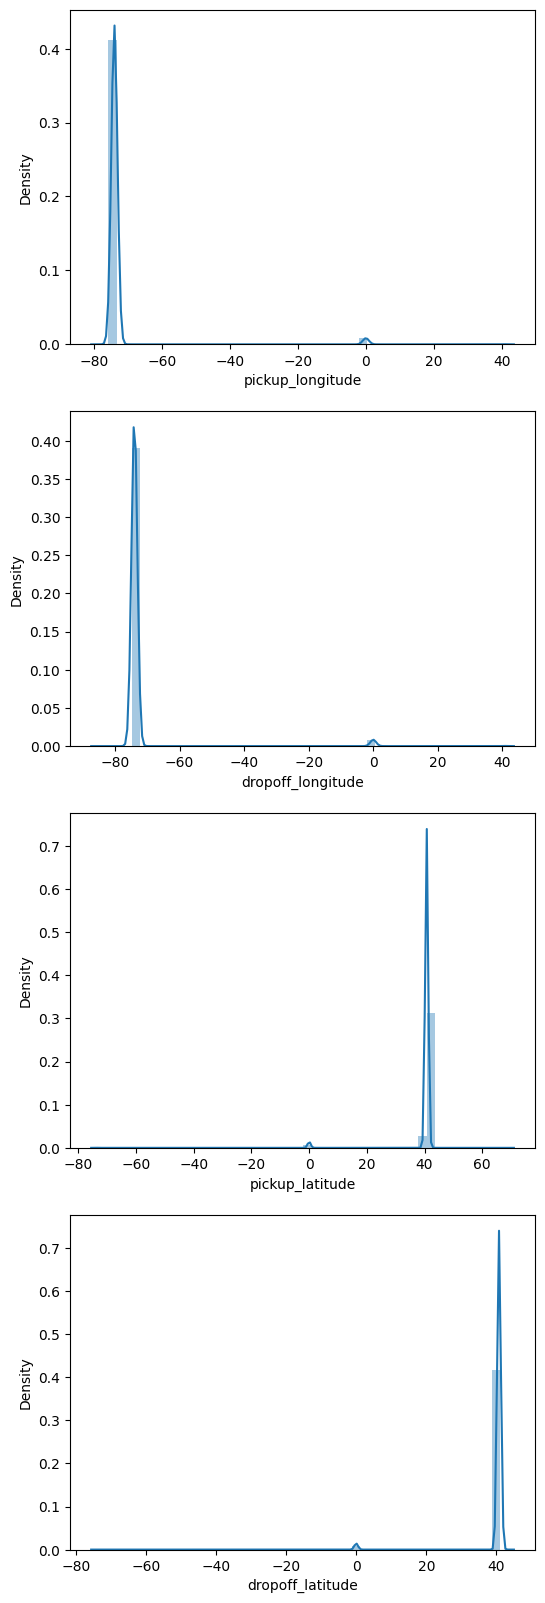

In [16]:
# Create subplots with 4 rows and a common x-axis for displaying distribution plots of longitude and latitude values
fig, axs = plt.subplots(4, figsize=(6, 20))

# Plot the distribution of 'pickup_longitude' in the first subplot
sns.distplot(data['pickup_longitude'], ax=axs[0])

# Plot the distribution of 'dropoff_longitude' in the second subplot
sns.distplot(data['dropoff_longitude'], ax=axs[1])

# Plot the distribution of 'pickup_latitude' in the third subplot
sns.distplot(data['pickup_latitude'], ax=axs[2])

# Plot the distribution of 'dropoff_latitude' in the fourth subplot
sns.distplot(data['dropoff_latitude'], ax=axs[3])

In [17]:
# Drop rows from the 'data' DataFrame where 'fare_amount' is less than or equal to 0
data.drop(data[data['fare_amount'] <= 0].index, inplace=True)

# Drop rows from the 'data' DataFrame where 'passenger_count' is equal to 0
data.drop(data[data['passenger_count'] == 0].index, inplace=True)

In [18]:

# Display concise information about the 'data' DataFrame after data cleaning steps
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 199262 entries, 0 to 199999
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   fare_amount        199262 non-null  float64
 1   pickup_longitude   199262 non-null  float64
 2   pickup_latitude    199262 non-null  float64
 3   dropoff_longitude  199262 non-null  float64
 4   dropoff_latitude   199262 non-null  float64
 5   passenger_count    199262 non-null  int64  
 6   day                199262 non-null  int64  
 7   hour               199262 non-null  int64  
 8   weekday            199262 non-null  int64  
 9   month              199262 non-null  int64  
 10  year               199262 non-null  int64  
dtypes: float64(5), int64(6)
memory usage: 18.2 MB


<Axes: >

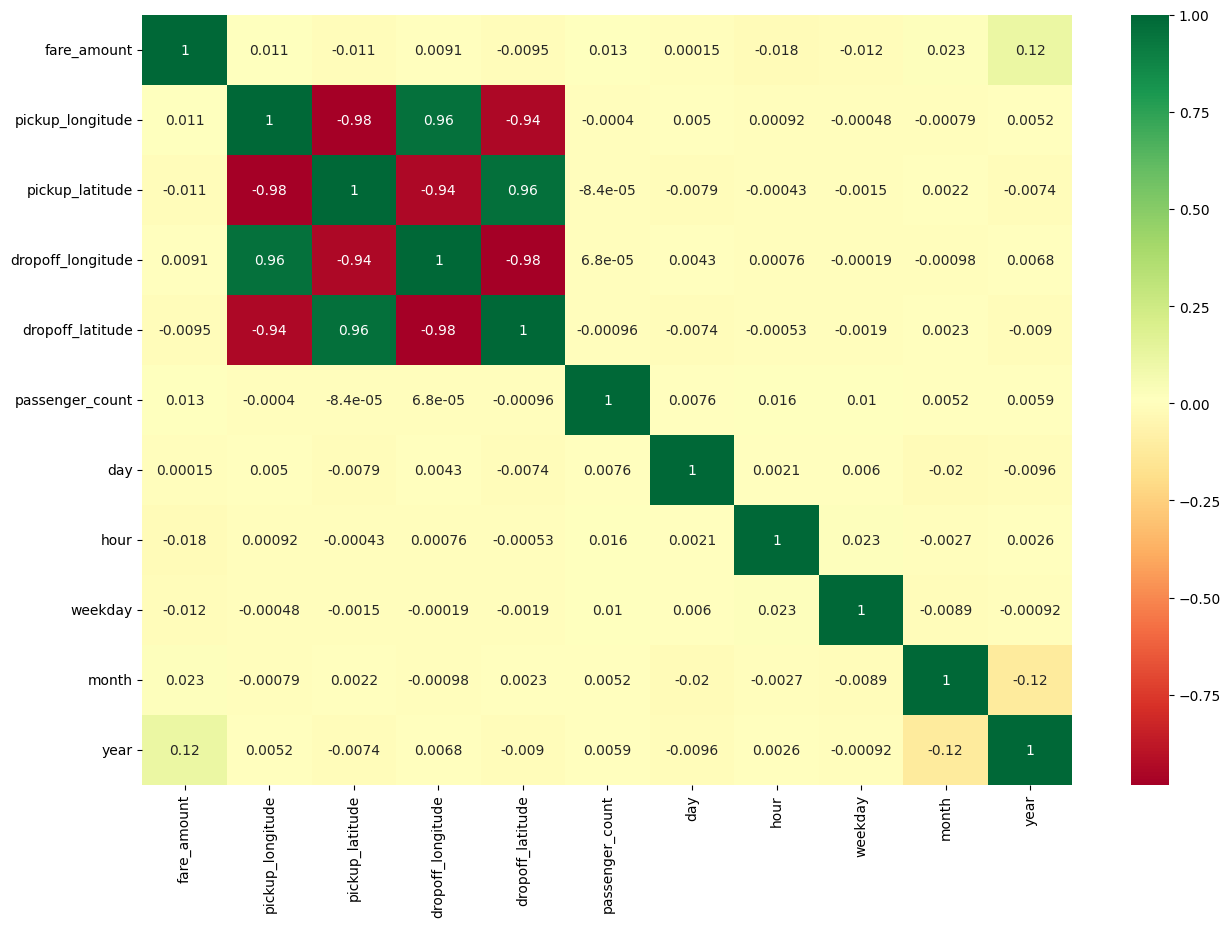

In [19]:
# Create a heatmap to visualize the correlation matrix of the 'data' DataFrame
# The 'annot=True' parameter displays correlation values on the heatmap
# The 'cmap='RdYlGn'' parameter sets the color map for the heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(data.corr(), annot=True, cmap='RdYlGn')

In [20]:

# Separate the features (x) and the target variable (y) in the 'data' DataFrame
x = data.drop('fare_amount', axis=1)  # Features excluding 'fare_amount'
y = data['fare_amount']  # Target variable 'fare_amount'

In [21]:


# Split the dataset into training and testing sets using the train_test_split function
# 'x_train' and 'y_train' represent the features and target variable for training, respectively
# 'x_test' and 'y_test' represent the features and target variable for testing, respectively
# The 'test_size=0.2' parameter specifies that 20% of the data will be used for testing
# The 'random_state=42' parameter ensures reproducibility by fixing the random seed
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [22]:

# Import the LinearRegression model from scikit-learn
from sklearn.linear_model import LinearRegression

# Create a Linear Regression model and fit it to the training data
lrmodel = LinearRegression()
lrmodel.fit(x_train, y_train)

LinearRegression()

In [23]:
# Import necessary metrics for model evaluation from scikit-learn
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, accuracy_score

# Predict the target variable on the test set using the Linear Regression model
predicted_values = lrmodel.predict(x_test)

# Calculate R-squared for Linear Regression model
lr_model_r2 = r2_score(y_test, predicted_values)
print("R-squared value for Linear Regression is:", lr_model_r2)

# Calculate RMSE (Root Mean Squared Error) for Linear Regression model
lr_model_rmse = np.sqrt(mean_squared_error(predicted_values, y_test))
print("RMSE value for Linear Regression is:", lr_model_rmse)

# Calculate MAE (Mean Absolute Error) for Linear Regression model
lr_model_mae = mean_absolute_error(predicted_values, y_test)
print("MAE value for Linear Regression is:", lr_model_mae)

R-squared value for Linear Regression is: 0.014553686726155868
RMSE value for Linear Regression is: 10.001406359465461
MAE value for Linear Regression is: 5.9921082807592665


In [24]:

# Import the RandomForestRegressor model from scikit-learn
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the RandomForestRegressor model to the training data
regressor.fit(x_train, y_train)

RandomForestRegressor(random_state=42)

In [25]:

# Predict the target variable on the test set using the RandomForestRegressor model
predict = regressor.predict(x_test)

In [26]:

# Calculate R-squared for RandomForestRegressor model
rf_model_r2 = r2_score(y_test, predict)
print("R-squared value for RandomForestRegressor is:", rf_model_r2)

# Calculate RMSE (Root Mean Squared Error) for RandomForestRegressor model
rf_model_rmse = np.sqrt(mean_squared_error(y_test, predict))
print("RMSE value for RandomForestRegressor is:", rf_model_rmse)

# Calculate MAE (Mean Absolute Error) for RandomForestRegressor model
rf_model_mae = mean_absolute_error(y_test, predict)
print("MAE value for RandomForestRegressor is:", rf_model_mae)

R-squared value for RandomForestRegressor is: 0.7296204170506185
RMSE value for RandomForestRegressor is: 5.238796582105566
MAE value for RandomForestRegressor is: 2.031639709704991


In [30]:
 
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

random_search = RandomizedSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_distributions=param_grid,
    n_iter=20,   # try only 20 random combinations              
    cv=3,
    scoring="neg_mean_squared_error",
    n_jobs=-1,   # use all CPU cores
    verbose=2,
    random_state=42
)

best_model = random_search.fit(x_train,y_train)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


In [31]:
# Use the best_model obtained from GridSearchCV to make predictions on the test set
best_model_predictions = best_model.predict(x_test)

# Calculate R2 score
r2 = r2_score(y_test, best_model_predictions)
print("R2 Score:", r2)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, best_model_predictions))
print("RMSE:", rmse)

# Calculate MAE
mae = mean_absolute_error(y_test, best_model_predictions)
print("MAE:", mae)

R2 Score: 0.7363788512133731
RMSE: 5.172907501384989
MAE: 1.9861301457933287


In [32]:
import pickle

# Save the trained RandomForestRegressor model to a binary file using pickle
FileName = 'UberFarePredictor.pkl'

with open(FileName, 'wb') as f:
    pickle.dump(best_model, f)